# Deep Learning with MNIST Dataset using Tensorflow and Keras

MNIST datatset:
MNIST datatset is a dataset of hand-written digits, 0 - 9. It contains 28x28 images of these hand-written digits.

In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

1.9.0
2.2.2


Using TensorFlow backend.


In [2]:
#Mnist dataset
mnist_data = keras.datasets.mnist

In [3]:
#Load the data from dataset
(xtrain, ytrain), (xtest, ytest) = mnist_data.load_data()

In [5]:
#Ananlyse the data
print(xtrain[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

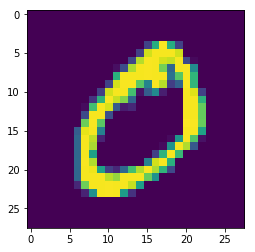

In [6]:

plt.imshow(xtrain[1])

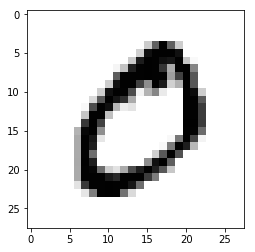

In [7]:
plt.imshow(xtrain[1], cmap = plt.cm.binary)
plt.show()

In [8]:
#Normalizing values
xtrain = keras.utils.normalize(xtrain, axis=1)
xtest = keras.utils.normalize(xtest, axis=1)

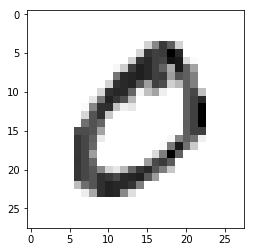

In [9]:
plt.imshow(xtrain[1], cmap = plt.cm.binary)
plt.show()

In [10]:
xtrain[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
from keras.models import Sequential
#Sequential Model
#Feed forward
model = Sequential()

In [12]:
#We need to flatten array, we don't need 28x28
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
h = model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.2579 - acc: 0.9233
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.1054 - acc: 0.9677
Epoch 3/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0712 - acc: 0.9775
Epoch 4/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0524 - acc: 0.9828
Epoch 5/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0408 - acc: 0.9864


We are getting an accuracy of 98% after 5 epoch, accuracy increased with epoch and loss went down.

In [13]:
print(h.history.keys())

dict_keys(['loss', 'acc'])


In [14]:
val_loss, val_accuracy = model.evaluate(xtest,ytest)
print(val_loss)
print(val_accuracy)

10000/10000 [==============================] - 0s 34us/step
0.08891911399220116
0.9734


## Saving the Model and Loading it for making predictions 

In [15]:
#Save the model
model.save('number_reader.model')

In [16]:
#Loading the Model
new_model = keras.models.load_model('number_reader.model')

In [17]:
#Predicting
preds = new_model.predict(xtest)

In [18]:
print(preds)

[[1.26984005e-11 2.43416082e-07 8.72344344e-07 ... 9.99978185e-01
  1.26549382e-09 5.17046050e-09]
 [3.92575764e-11 1.14302438e-05 9.99982715e-01 ... 1.13145960e-11
  1.03501892e-08 1.87722644e-14]
 [2.26517702e-08 9.99993801e-01 1.37940299e-06 ... 1.13065732e-06
  2.58910518e-06 3.71052411e-09]
 ...
 [3.58183795e-11 7.68589885e-08 7.65536801e-11 ... 2.21133942e-05
  1.01495282e-07 3.03058387e-05]
 [9.60294386e-08 1.43860416e-06 5.77644278e-06 ... 6.14013402e-07
  2.64818314e-03 1.33520445e-10]
 [1.27966338e-09 1.13801440e-10 1.70247527e-09 ... 1.90183741e-12
  1.72321962e-10 4.05390738e-12]]


In [19]:
import numpy as np
np.argmax(preds[1])

2

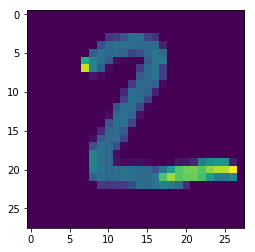

In [20]:
#Plotting the orginal tes
plt.imshow(xtest[1])
plt.show()